In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)

In [3]:
n_control = 10000
n_treatment = 10000

In [4]:
conversion_rate_control = 0.10

In [5]:
conversion_rate_treatment = 0.12

In [6]:
control_conversions = np.random.binomial(1, conversion_rate_control, n_control)
treatment_conversions = np.random.binomial(1, conversion_rate_treatment, n_treatment)


In [7]:
df = pd.DataFrame({
    'group': ['control'] * n_control + ['treatment'] * n_treatment,
    'conversion': np.concatenate([control_conversions, treatment_conversions])
})

conversion_rates = df.groupby('group')['conversion'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 group
control      0.0961
treatment    0.1249
Name: conversion, dtype: float64


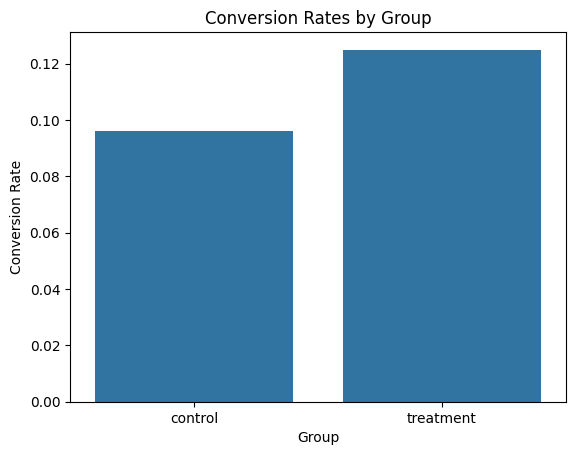

In [8]:
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Group')
plt.show()

In [9]:
conversion_control = np.sum(control_conversions)
conversion_treatment = np.sum(treatment_conversions)

conversion_rate_control = conversion_control / n_control
conversion_rate_treatment = conversion_treatment / n_treatment

In [10]:
p_pooled = (conversion_control + conversion_treatment) / (n_control + n_treatment)
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_control + 1/n_treatment))

In [11]:
z_score = (conversion_rate_treatment - conversion_rate_control) / se_pooled

p_value = stats.norm.sf(abs(z_score)) * 2

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: 6.50
P-value: 0.0000


In [12]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the conversion rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the conversion rates.")


Reject the null hypothesis: There is a significant difference between the conversion rates.
